In [107]:
import pandas as pd
import numpy as np
import glob
import MeCab
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import japanize_matplotlib

#### ToDo  
- 形態素にて名詞抽出  
- データフレーム格納  
- ランダムな曲に対してwordcloudを作成

#### Data loading

In [108]:
df = pd.read_csv('../data/j_pop_songs.csv')

#### 形態素関数にて名詞抽出＋格納

In [109]:
def get_noun(lyric):
    m = MeCab.Tagger('../../mecab-ipadic-neologd')
    lines = m.parse(lyric).splitlines()
    word_list = [line.split('\t')[0] for line in lines if '名詞' in line]
    return ' '.join(word_list)

In [110]:
df = df.dropna(subset=['lyrics'])

In [111]:
df['lyrics_noun'] = df.lyrics.apply(get_noun)

In [112]:
df['lyrics_noun'].head()

0    Butterfly 今日 今 時 赤い糸 光 輪 なか Butterfly 今日 今 君 羽...
1    スタンドアップ モンスター 頂上 道 道 時 スタンドアップ ファイター going on ...
2    カレンダー シャツ 袖口 太陽 気配 僕 腕 衣替え 海 波打ち際 君 裸足 水しぶき ポニ...
4    I want you I need you I love you 頭 中 MUSIC ヘビー...
5    涙 いつ 君の背中 ガマン そう 気持ち 笑顔 朝 泣き虫 君 きっと 心 素直 頬 雫 僕...
Name: lyrics_noun, dtype: object

#### Wordcloud

In [113]:
df_sample = df.sample(5)

In [114]:
df_sample

,year,order,artists,songs,lyrics,lyrics_noun
197,2019,18,スピッツ,優しいあの子,重い扉を押し開けたら 暗い道が続いてて めげずに歩いたその先に 知らなかった世界 氷を散らす...,扉 道 先 世界 氷 風 味方 ん こと 大空 色 子 ルルル 口 度 火 胸 コタン 仲間...
7,2010,8,木村カエラ,Ring a Ding Dong,ring a ding dong 何で？君の天気は雨？ こんなにボクの空 晴れだよ お気に...,ring a ding dong 君 天気 雨 ボク 空 晴れ お気に入り ボク 傘 君 涙...
27,2011,8,AKB48,フライングゲット,Na Na Na Na Na Na Na Na Na Na Na Na Na Na N...,Na Na Na Na Na Na Na Na Na Na Na Na Na Na Na N...
135,2016,16,AI,みんながみんな英雄,特別じゃない 英雄じゃない みんなの上には空がある 雨の日もある 風の日もある たまに晴れ...,特別 英雄 みんな 上 空 雨 日 風 日 たま まるもうけ 君 前 友 明日 あした あさ...
56,2012,17,ナオト・インティライミ,君に逢いたかった,君に会いたかった ただ会いたかった 運命に引き離されても 夜空を巡って 時間(トキ)を越えて...,君 会いたかった 会いたかった 運命 夜空 時間 トキ 君 イミ 声 瞬間 人 ん 電話 越...


In [127]:
from wordcloud import WordCloud

In [130]:
font = '../data/ipaexg00401/ipaexg.ttf'

https://yukituna.com/2263/

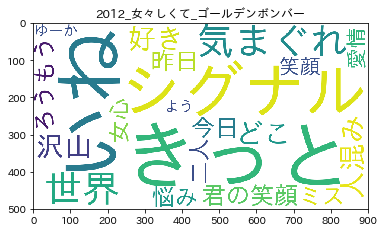

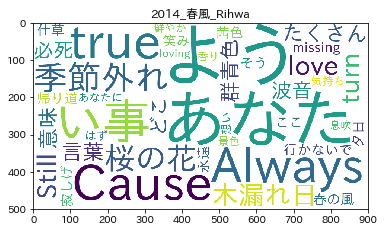

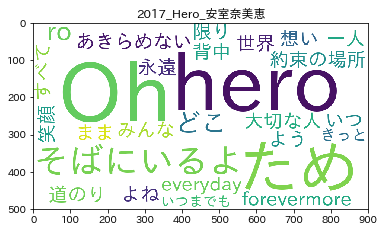

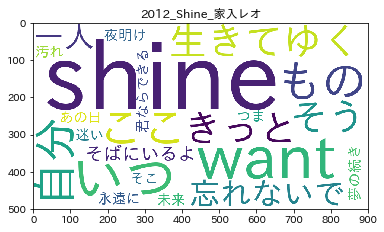

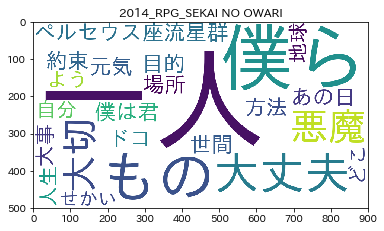

In [144]:
N = df.shape[0]-1
for i in range(5):
    idx = np.random.choice(N)
    choice = df.iloc[idx]
    plt.figure()
    plt.title('%s_%s_%s'%(choice['year'],choice['songs'],choice['artists']))
    wordcloud = WordCloud(background_color="white", width=900, height=500,font_path=font).generate(choice['lyrics_noun'])
    plt.imshow(wordcloud)
    plt.show()